In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")


In [2]:
# Step 2: Load CSV file
df = pd.read_csv('SpotifyFeatures.csv')

# Preview the first 5 rows
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Step 3: Check column info and missing values
df.info()
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
# Step 4: Correlation with popularity
correlation = df.corr(numeric_only=True)['popularity'].sort_values(ascending=False)
print("Correlation with Popularity:\n", correlation)


Correlation with Popularity:
 popularity          1.000000
loudness            0.363011
danceability        0.256564
energy              0.248922
tempo               0.081039
valence             0.060076
duration_ms         0.002348
speechiness        -0.151076
liveness           -0.167995
instrumentalness   -0.210983
acousticness       -0.381295
Name: popularity, dtype: float64


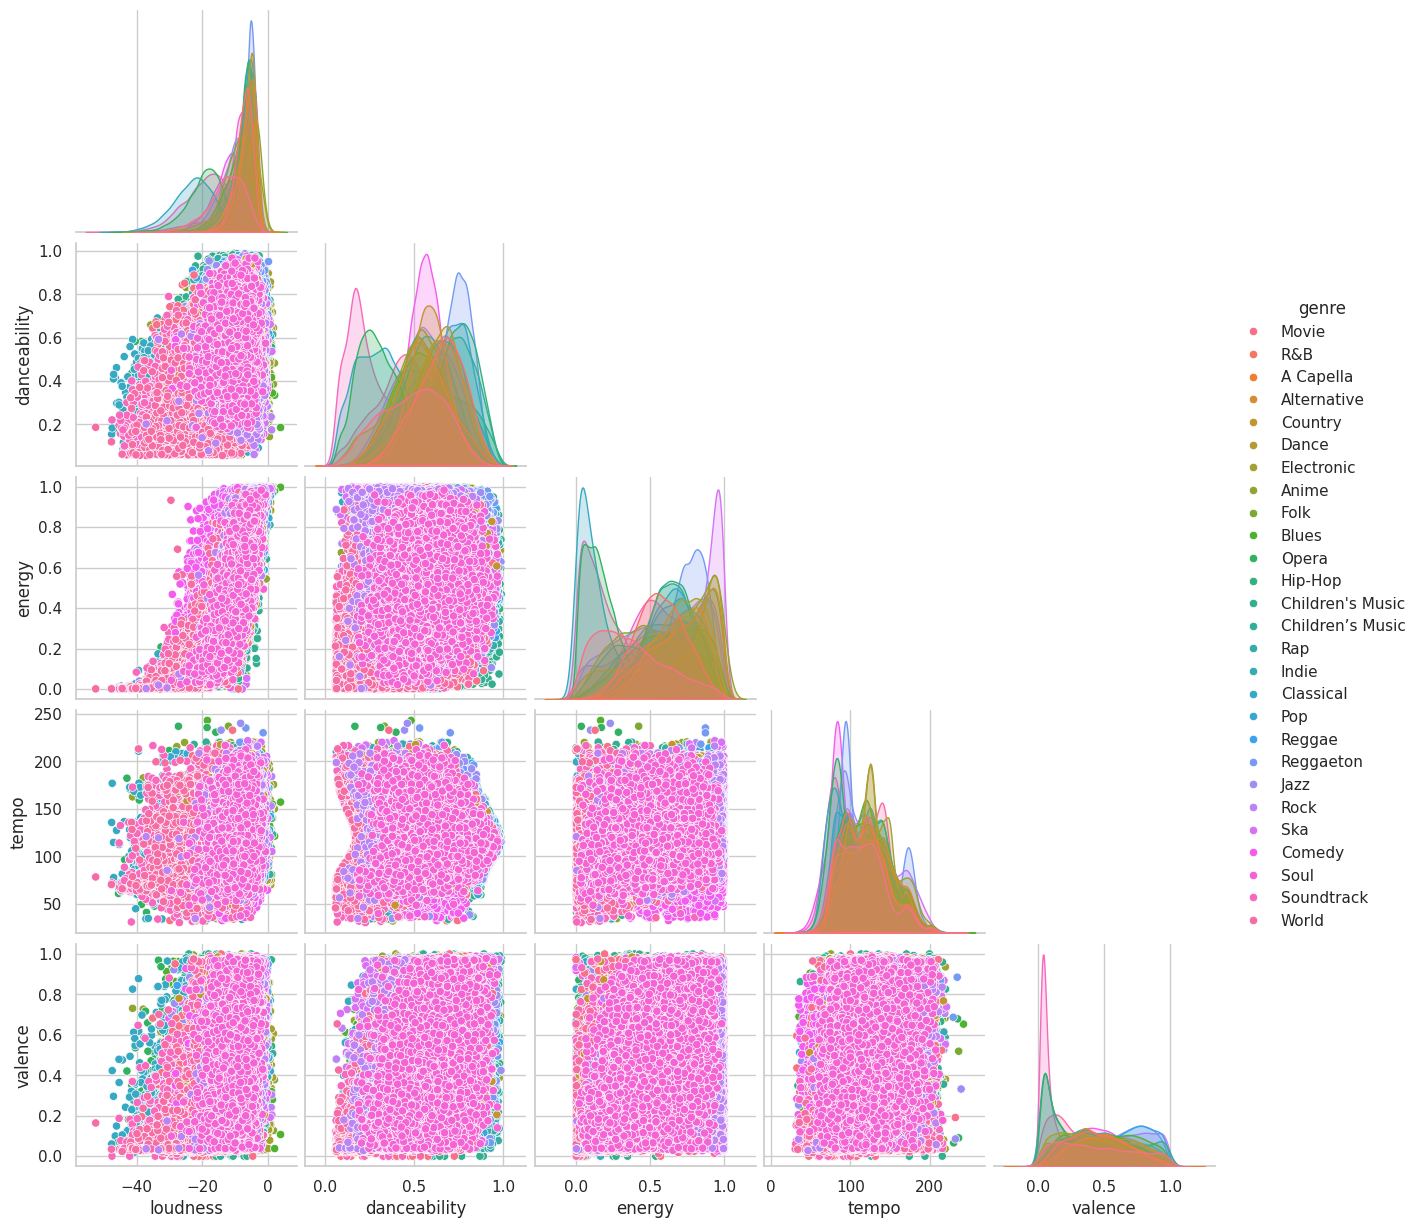

In [5]:
# Step 5: Visualize features most correlated with popularity
top_features = correlation[1:6].index  # Skip popularity itself

# Plot pairplot for top correlated features
sns.pairplot(df, vars=top_features, hue='genre', corner=True)
plt.show()


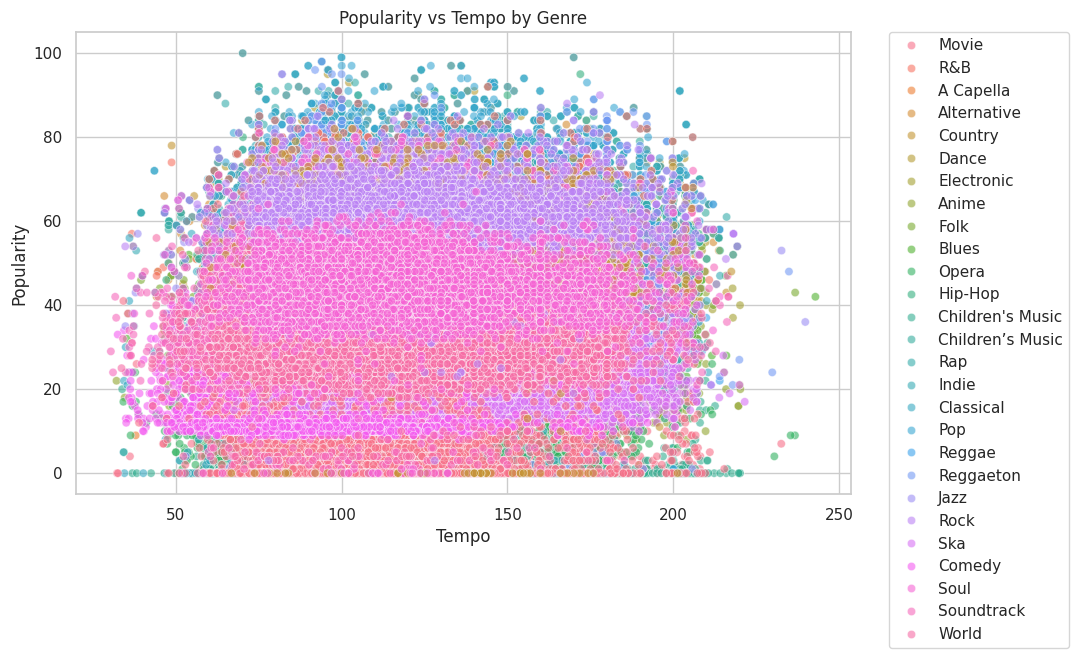

In [7]:
# Step 6: Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='tempo', y='popularity', data=df, hue='genre', alpha=0.6)
plt.title('Popularity vs Tempo by Genre')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## 📝 Observations

- Songs with a tempo between 90–120 BPM seem to be more popular.
- Dance and pop genres dominate in higher popularity regions.
- Slower tempo genres like classical or jazz have lower popularity scores.
- Some genres have tight clusters, suggesting tempo-based consistency (e.g., EDM).
- Outliers suggest that not all fast songs are popular — lyrics or artist might influence popularity too.


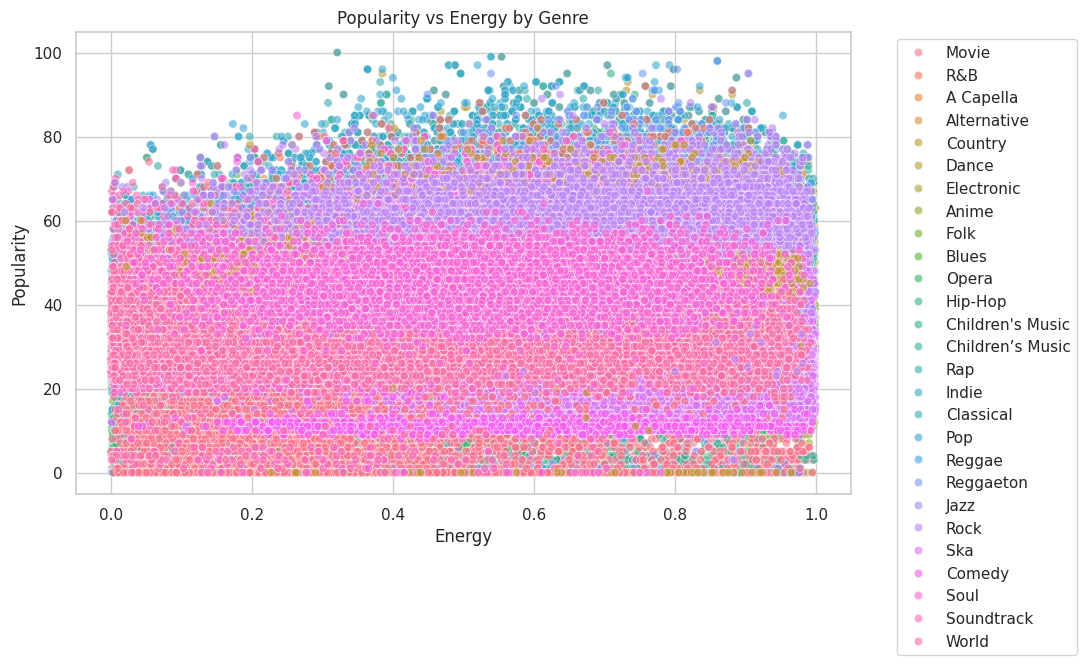

In [8]:
# Popularity vs Energy
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy', y='popularity', data=df, hue='genre', alpha=0.6)
plt.title('Popularity vs Energy by Genre')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
